In [1]:
import tsfresh as ts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle

In [2]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee_scaled.pickle', 'rb') as handle:
    df = pickle.load(handle)

### DF passend für tsfresh machen

In [3]:
df.head()

,time,x,y,z,day_number,day_name,Status
0,2022-01-28 10:39:28.532,0.242,0.053,4.267,4,Freitag,0
1,2022-01-28 10:39:28.742,0.245,0.066,4.292,4,Freitag,0
2,2022-01-28 10:39:28.915,0.261,0.092,4.271,4,Freitag,0
3,2022-01-28 10:39:29.237,0.240,0.083,4.260,4,Freitag,0
4,2022-01-28 10:39:29.455,0.270,0.086,4.258,4,Freitag,0


In [3]:
df.drop(['day_number','day_name','Status'], axis=1, inplace=True)

In [4]:
df['id'] = 1

In [5]:
df.head()

,time,x,y,z,id
0,2022-01-28 10:39:28.532,-0.286314,0.185127,-0.094353,1
1,2022-01-28 10:39:28.742,-0.224631,0.579710,0.564770,1
2,2022-01-28 10:39:28.915,0.104340,1.368876,0.011101,1
3,2022-01-28 10:39:29.237,-0.327435,1.095703,-0.278910,1
4,2022-01-28 10:39:29.455,0.289387,1.186761,-0.331649,1


## Rolling

mit kleinem Datensatz testen

In [6]:
df_small = df[1453209:1455209]

In [7]:
df_small

,time,x,y,z,id
1453209,2022-01-31 08:39:20.881,0.241,0.026,4.231,1
1453210,2022-01-31 08:39:21.031,0.252,0.013,4.254,1
1453211,2022-01-31 08:39:21.173,0.250,0.019,4.272,1
1453212,2022-01-31 08:39:21.323,0.284,0.024,4.254,1
1453213,2022-01-31 08:39:21.488,0.253,0.029,4.272,1
...,...,...,...,...,...
1455204,2022-01-31 08:45:10.968,0.252,0.045,4.257,1
1455205,2022-01-31 08:45:11.125,0.293,0.032,4.275,1
1455206,2022-01-31 08:45:11.290,0.229,0.036,4.242,1
1455207,2022-01-31 08:45:11.485,0.267,0.045,4.262,1


In [7]:
df_small.time = df_small.index

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df_small

,time,x,y,z,id
1453209,1453209,0.241,0.026,4.231,1
1453210,1453210,0.252,0.013,4.254,1
1453211,1453211,0.250,0.019,4.272,1
1453212,1453212,0.284,0.024,4.254,1
1453213,1453213,0.253,0.029,4.272,1
...,...,...,...,...,...
1455204,1455204,0.252,0.045,4.257,1
1455205,1455205,0.293,0.032,4.275,1
1455206,1455206,0.229,0.036,4.242,1
1455207,1455207,0.267,0.045,4.262,1


In [8]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df_small, column_id="id", column_sort="time", max_timeshift=50)

Rolling: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


In [103]:
df_rolled

,time,x,y,z,id
0,0,0.242,0.053,4.267,"(1, 0)"
1,0,0.242,0.053,4.267,"(1, 1)"
2,1,0.245,0.066,4.292,"(1, 1)"
3,0,0.242,0.053,4.267,"(1, 2)"
4,1,0.245,0.066,4.292,"(1, 2)"
...,...,...,...,...,...
508720,9995,0.231,-0.001,4.285,"(1, 9999)"
508721,9996,0.214,0.028,4.260,"(1, 9999)"
508722,9997,0.196,0.059,4.265,"(1, 9999)"
508723,9998,0.189,0.039,4.267,"(1, 9999)"


In [9]:
from tsfresh import extract_features
df_features = extract_features(df_rolled, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 10/10 [04:02<00:00, 24.29s/it]


In [12]:
df_features

x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
1 1453209                                         0.0                   0.0   
  1453210                                         0.0                   0.0   
  1453211                                         0.0                   0.0   
  1453212                                         0.0                   0.0   
  1453213                                         0.0                   0.0   
...                                               ...                   ...   
  1455204                                         0.0                   0.0   
  1455205                                         0.0                   0.0   
  1455206                                         0.0                   0.0   
  1455207                                         0.0                   0.0   
  1455208                                         0.0                   0.0   

           x__has_duplicate_min  x__has_duplicate  x__sum_values  \
1 1453209                   0.0               0.0          0.241   
  1453210                   0.0               0.0          0.493   
  1453211                   0.0               0.0          0.743   
  1453212                   0.0               0.0          1.027   
  1453213                   0.0               0.0          1.280   
...                         ...               ...            ...   
  1455204                   0.0               1.0         13.072   
  1455205                   0.0               1.0         13.126   
  1455206                   0.0               1.0         13.085   
  1455207                   0.0               1.0         13.094   
  1455208                   0.0               1.0         13.085   

           x__abs_energy  x__mean_abs_change  x__mean_change  \
1 1453209       0.058081                 NaN             NaN   
  1453210       0.121585            0.011000        0.011000   
  1453211       0.184085            0.006500        0.004500   
  1453212       0.264741            0.015667        0.014333   
  1453213       0.328750            0.019500        0.003000   
...                  ...                 ...             ...   
  1455204       3.358210            0.013620        0.000260   
  1455205       3.386938            0.013820        0.000460   
  1455206       3.366479            0.014860       -0.000580   
  1455207       3.371204            0.015520        0.000080   
  1455208       3.366551            0.015660       -0.000060   

           x__mean_second_derivative_central  x__median  ...  \
1 1453209                                NaN     0.2410  ...   
  1453210                                NaN     0.2465  ...   
  1453211                          -0.006500     0.2500  ...   
  1453212                           0.005750     0.2510  ...   
  1453213                          -0.007000     0.2520  ...   
...                                      ...        ...  ...   
  1455204                          -0.000490     0.2560  ...   
  1455205                           0.000541     0.2570  ...   
  1455206                          -0.000704     0.2560  ...   
  1455207                           0.000449     0.2560  ...   
  1455208                          -0.000194     0.2550  ...   

           z__permutation_entropy__dimension_6__tau_1  \
1 1453209                                         NaN   
  1453210                                         NaN   
  1453211                                         NaN   
  1453212                                         NaN   
  1453213                                         NaN   
...                                               ...   
  1455204                                    3.798505   
  1455205                                    3.798505   
  1455206                                    3.798505   
  1455207                                    3.798505   
  1455208                                    3.798505   

           z__permutat

In [10]:
df_features_finite = df_features.replace([np.inf, -np.inf], np.nan)

In [11]:
df_features_col_nan = df_features_finite.dropna(axis=1, how='all')

In [15]:
df_features_col_nan

x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
1 1453209                                         0.0                   0.0   
  1453210                                         0.0                   0.0   
  1453211                                         0.0                   0.0   
  1453212                                         0.0                   0.0   
  1453213                                         0.0                   0.0   
...                                               ...                   ...   
  1455204                                         0.0                   0.0   
  1455205                                         0.0                   0.0   
  1455206                                         0.0                   0.0   
  1455207                                         0.0                   0.0   
  1455208                                         0.0                   0.0   

           x__has_duplicate_min  x__has_duplicate  x__sum_values  \
1 1453209                   0.0               0.0          0.241   
  1453210                   0.0               0.0          0.493   
  1453211                   0.0               0.0          0.743   
  1453212                   0.0               0.0          1.027   
  1453213                   0.0               0.0          1.280   
...                         ...               ...            ...   
  1455204                   0.0               1.0         13.072   
  1455205                   0.0               1.0         13.126   
  1455206                   0.0               1.0         13.085   
  1455207                   0.0               1.0         13.094   
  1455208                   0.0               1.0         13.085   

           x__abs_energy  x__mean_abs_change  x__mean_change  \
1 1453209       0.058081                 NaN             NaN   
  1453210       0.121585            0.011000        0.011000   
  1453211       0.184085            0.006500        0.004500   
  1453212       0.264741            0.015667        0.014333   
  1453213       0.328750            0.019500        0.003000   
...                  ...                 ...             ...   
  1455204       3.358210            0.013620        0.000260   
  1455205       3.386938            0.013820        0.000460   
  1455206       3.366479            0.014860       -0.000580   
  1455207       3.371204            0.015520        0.000080   
  1455208       3.366551            0.015660       -0.000060   

           x__mean_second_derivative_central  x__median  ...  \
1 1453209                                NaN     0.2410  ...   
  1453210                                NaN     0.2465  ...   
  1453211                          -0.006500     0.2500  ...   
  1453212                           0.005750     0.2510  ...   
  1453213                          -0.007000     0.2520  ...   
...                                      ...        ...  ...   
  1455204                          -0.000490     0.2560  ...   
  1455205                           0.000541     0.2570  ...   
  1455206                          -0.000704     0.2560  ...   
  1455207                           0.000449     0.2560  ...   
  1455208                          -0.000194     0.2550  ...   

           z__permutation_entropy__dimension_5__tau_1  \
1 1453209                                         NaN   
  1453210                                         NaN   
  1453211                                         NaN   
  1453212                                         NaN   
  1453213                                   -0.000000   
...                                               ...   
  1455204                                    3.673174   
  1455205                                    3.673174   
  1455206                                    3.673174   
  1455207                                    3.673174   
  1455208                                    3.673174   

           z__permutat

In [12]:
df_features_interpolate = df_features_col_nan.interpolate(method ='linear', limit_direction ='backward')

In [110]:
np.any(np.isnan(df_features_interpolate))

True

In [13]:
df_features_interpolate_forward = df_features_interpolate.interpolate(method ='linear', limit_direction ='forward')

In [112]:
np.any(np.isnan(df_features_interpolate_forward))

False

In [113]:
df_features_interpolate_forward

x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
1 0                                            0.0                   0.0   
  1                                            0.0                   0.0   
  2                                            0.0                   0.0   
  3                                            0.0                   0.0   
  4                                            0.0                   0.0   
...                                            ...                   ...   
  9995                                         0.0                   0.0   
  9996                                         0.0                   0.0   
  9997                                         0.0                   0.0   
  9998                                         0.0                   0.0   
  9999                                         0.0                   0.0   

        x__has_duplicate_min  x__has_duplicate  x__sum_values  x__abs_energy  \
1 0                      0.0               0.0          0.242       0.058564   
  1                      0.0               0.0          0.487       0.118589   
  2                      0.0               0.0          0.748       0.186710   
  3                      0.0               0.0          0.988       0.244310   
  4                      0.0               0.0          1.258       0.317210   
...                      ...               ...            ...            ...   
  9995                   0.0               1.0         11.370       2.547528   
  9996                   0.0               1.0         11.347       2.537155   
  9997                   0.0               1.0         11.293       2.513071   
  9998                   0.0               1.0         11.285       2.509983   
  9999                   0.0               1.0         11.291       2.512755   

        x__mean_abs_change  x__mean_change  x__mean_second_derivative_central  \
1 0               0.003000        0.003000                           0.006500   
  1               0.003000        0.003000                           0.006500   
  2               0.009500        0.009500                           0.006500   
  3               0.013333       -0.000667                          -0.006000   
  4               0.017500        0.007000                           0.004500   
...                    ...             ...                                ...   
  9995            0.018600       -0.000120                          -0.000316   
  9996            0.018680       -0.000720                           0.000367   
  9997            0.017980       -0.000020                          -0.000500   
  9998            0.017500       -0.000780                          -0.000194   
  9999            0.018160       -0.000120                           0.000561   

        x__median  ...  z__permutation_entropy__dimension_5__tau_1  \
1 0        0.2420  ...                                   -0.000000   
  1        0.2435  ...                                   -0.000000   
  2        0.2450  ...                                   -0.000000   
  3        0.2435  ...                                   -0.000000   
  4        0.2450  ...                                   -0.000000   
...           ...  ...                                         ...   
  9995     0.2230  ...                                    3.591917   
  9996     0.2220  ...                                    3.621412   
  9997     0.2210  ...                                    3.650908   
  9998     0.2210  ...                                    3.650908   
  9999     0.2210  ...                                    3.650908   

        z__permutation_entropy__dimension_6__tau_1  \
1 0                                      -0.000000   
  1                                      -0.000000   
  2                                      -0.000000   
  3                                      -0.000000   
  4                                      -0.000000

In [14]:
df_features_interpolate_forward_rounded = df_features_interpolate_forward.round(6)

In [115]:
df_features_interpolate_forward_rounded

x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
1 0                                            0.0                   0.0   
  1                                            0.0                   0.0   
  2                                            0.0                   0.0   
  3                                            0.0                   0.0   
  4                                            0.0                   0.0   
...                                            ...                   ...   
  9995                                         0.0                   0.0   
  9996                                         0.0                   0.0   
  9997                                         0.0                   0.0   
  9998                                         0.0                   0.0   
  9999                                         0.0                   0.0   

        x__has_duplicate_min  x__has_duplicate  x__sum_values  x__abs_energy  \
1 0                      0.0               0.0          0.242       0.058564   
  1                      0.0               0.0          0.487       0.118589   
  2                      0.0               0.0          0.748       0.186710   
  3                      0.0               0.0          0.988       0.244310   
  4                      0.0               0.0          1.258       0.317210   
...                      ...               ...            ...            ...   
  9995                   0.0               1.0         11.370       2.547528   
  9996                   0.0               1.0         11.347       2.537155   
  9997                   0.0               1.0         11.293       2.513071   
  9998                   0.0               1.0         11.285       2.509983   
  9999                   0.0               1.0         11.291       2.512755   

        x__mean_abs_change  x__mean_change  x__mean_second_derivative_central  \
1 0               0.003000        0.003000                           0.006500   
  1               0.003000        0.003000                           0.006500   
  2               0.009500        0.009500                           0.006500   
  3               0.013333       -0.000667                          -0.006000   
  4               0.017500        0.007000                           0.004500   
...                    ...             ...                                ...   
  9995            0.018600       -0.000120                          -0.000316   
  9996            0.018680       -0.000720                           0.000367   
  9997            0.017980       -0.000020                          -0.000500   
  9998            0.017500       -0.000780                          -0.000194   
  9999            0.018160       -0.000120                           0.000561   

        x__median  ...  z__permutation_entropy__dimension_5__tau_1  \
1 0        0.2420  ...                                   -0.000000   
  1        0.2435  ...                                   -0.000000   
  2        0.2450  ...                                   -0.000000   
  3        0.2435  ...                                   -0.000000   
  4        0.2450  ...                                   -0.000000   
...           ...  ...                                         ...   
  9995     0.2230  ...                                    3.591917   
  9996     0.2220  ...                                    3.621412   
  9997     0.2210  ...                                    3.650908   
  9998     0.2210  ...                                    3.650908   
  9999     0.2210  ...                                    3.650908   

        z__permutation_entropy__dimension_6__tau_1  \
1 0                                      -0.000000   
  1                                      -0.000000   
  2                                      -0.000000   
  3                                      -0.000000   
  4                                      -0.000000

In [15]:
df_features_interpolate_forward_rounded.reset_index(inplace=True, drop=True)

In [16]:
df_features_interpolate_forward_rounded

,x__variance_larger_than_standard_deviation,x__has_duplicate_max,x__has_duplicate_min,x__has_duplicate,x__sum_values,x__abs_energy,x__mean_abs_change,x__mean_change,x__mean_second_derivative_central,x__median,...,z__permutation_entropy__dimension_5__tau_1,z__permutation_entropy__dimension_6__tau_1,z__permutation_entropy__dimension_7__tau_1,"z__matrix_profile__feature_""min""__threshold_0.98","z__matrix_profile__feature_""max""__threshold_0.98","z__matrix_profile__feature_""mean""__threshold_0.98","z__matrix_profile__feature_""median""__threshold_0.98","z__matrix_profile__feature_""25""__threshold_0.98","z__matrix_profile__feature_""75""__threshold_0.98",z__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,-0.306874,0.094172,0.226168,0.226168,-0.133645,-0.306874,...,-0.000000,-0.000000,-0.000000,1.531391,3.231057,2.450793,2.566027,2.143239,2.898808,0.477349
1,0.0,0.0,0.0,0.0,-0.387580,0.100685,0.226168,0.226168,-0.133645,-0.193790,...,-0.000000,-0.000000,-0.000000,1.531391,3.231057,2.450793,2.566027,2.143239,2.898808,0.477349
2,0.0,0.0,0.0,0.0,-0.509408,0.115527,0.133645,0.092523,-0.133645,-0.121828,...,-0.000000,-0.000000,-0.000000,1.531391,3.231057,2.450793,2.566027,2.143239,2.898808,0.477349
3,0.0,0.0,0.0,0.0,0.067829,0.448730,0.322118,0.294704,0.118224,-0.101267,...,-0.000000,-0.000000,-0.000000,1.531391,3.231057,2.450793,2.566027,2.143239,2.898808,0.477349
4,0.0,0.0,0.0,0.0,0.007683,0.452348,0.400934,0.061682,-0.143925,-0.080706,...,-0.000000,-0.000000,-0.000000,1.531391,3.231057,2.450793,2.566027,2.143239,2.898808,0.477349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,1.0,0.407341,3.248648,0.280037,0.005346,-0.010071,0.001537,...,3.673174,3.798505,3.806662,1.270373,3.266689,2.595240,2.692830,2.394176,2.883154,0.935080
1996,0.0,0.0,0.0,1.0,1.517621,3.708624,0.284149,0.009458,0.011120,0.022097,...,3.673174,3.798505,3.806662,1.270373,3.266689,2.595240,2.692830,2.394176,2.883154,0.935080
1997,0.0,0.0,0.0,1.0,0.674631,3.931355,0.305532,-0.011925,-0.014476,0.001537,...,3.673174,3.798505,3.806662,1.270373,3.266689,2.595240,2.692830,2.394176,2.883154,0.938846
1998,0.0,0.0,0.0,1.0,0.859677,3.981385,0.319103,0.001645,0.009231,0.001537,...,3.673174,3.798505,3.806662,1.270373,3.266689,2.595240,2.692830,2.394176,2.883154,0.938846


In [21]:
np.all(np.isfinite(df_features_interpolate_forward_rounded))

True

In [82]:
df_features_interpolate_forward_rounded.loc[50]

x__variance_larger_than_standard_deviation              0.000000
x__has_duplicate_max                                    0.000000
x__has_duplicate_min                                    0.000000
x__has_duplicate                                        1.000000
x__sum_values                                          13.052000
                                                         ...    
z__matrix_profile__feature_"mean"__threshold_0.98       2.484287
z__matrix_profile__feature_"median"__threshold_0.98     2.543217
z__matrix_profile__feature_"25"__threshold_0.98         2.309475
z__matrix_profile__feature_"75"__threshold_0.98         2.668601
z__mean_n_absolute_max__number_of_maxima_7              4.297143
Name: 50, Length: 1470, dtype: float64

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(df_features_interpolate_forward_rounded)

In [18]:
labels = kmeans.labels_

In [120]:
kmeans.cluster_centers_

array([[ 2.06947524e-03,  6.91796009e-02,  5.91278640e-02, ...,
         2.50608857e+00,  3.01300361e+00,  4.38105344e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.30947500e+00,  2.66860100e+00,  4.26785700e+00],
       [-6.50521303e-19,  8.51129681e-02,  6.03528319e-02, ...,
         2.52380075e+00,  3.02592292e+00,  4.30019909e+00],
       [ 2.16840434e-19,  0.00000000e+00,  0.00000000e+00, ...,
         2.30947500e+00,  2.66860100e+00,  4.26785700e+00]])

In [19]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [20]:
vals = dict(zip(unique, counts))

In [21]:
vals

{0: 1896, 1: 104}

In [ ]:
''' noch rausfinden:
Welche Zahl steht für welchen Status?
Wird Zeitfolge beachtet? -> Kommen gleiche Zahlen hintereinander vor (sollte so sein)?
Plotten oder Ähnliches
'''

In [32]:
len(labels)

2000

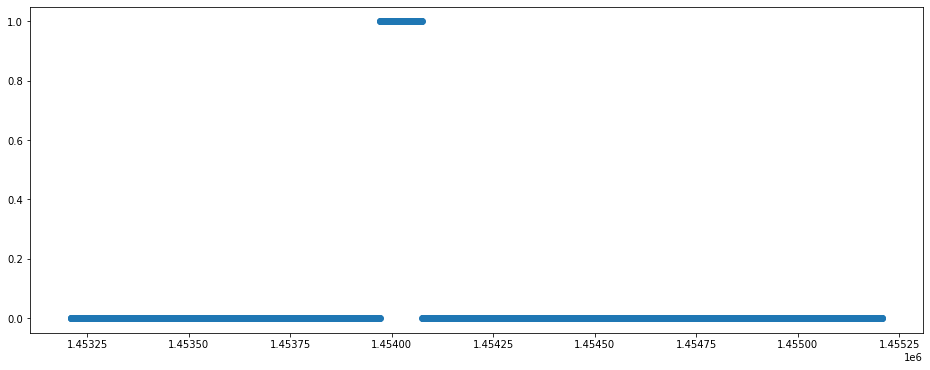

In [25]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df_small.time, labels)

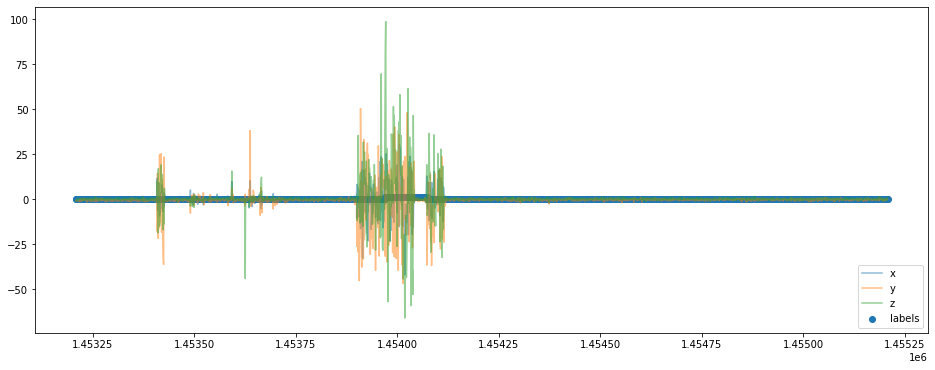

In [22]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_small.time, df_small.x, label="x", alpha=0.5)
ax.plot(df_small.time, df_small.y, label='y', alpha=0.5)
ax.plot(df_small.time, df_small.z, label='z', alpha=0.5)
ax.scatter(df_small.time, labels, label='labels')

plt.legend(loc=4)